# kNN
* kNN - распознавание растровых изображений
* kNN- и ODIN-идентификаторы 

In [1]:
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score

### Функции расстояния между точками
Евклидово расстояние

In [2]:
def euc_dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

Квадрат Евклидова расстояния

In [3]:
def euc_dist_sqr(x, y):
    return np.sum((x-y)**2)

Модульное расстояние

In [4]:
def abs_dist(x, y):
    return np.sum((np.abs(x-y)))

Расстояние Чебышева

In [5]:
def cheb_dist(x, y):
    return np.max((np.abs(x-y)))

### Реализация kNN

Для каждого объекта из тестовой выборки считаем расстояние до всех объектов в обучающей выборке. Выбираем k ближайших и вычисляем вектор вероятностей принадлежности объекта к каждому из классов в разметке.

In [6]:
class KNN:
    def __init__(self, k=3):
        self.y_train = None
        self.x_train = None
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test, dist_func):
        predictions = []
        for i in range(len(x_test)):
            dist = np.array([dist_func(x_test[i], x_t) for x_t in self.x_train])
            dist_sorted = dist.argsort()[:self.k]
            neigh_count = [0] * 10
            
            for idx in dist_sorted:
                neigh_count[self.y_train[idx]] += 1
                
            neigh_probs = [0] * 10
            for j in range(0, 10):
                neigh_probs[j] = neigh_count[j] / self.k
                
            predictions.append(neigh_probs)
        return predictions

### Импорт данных MNIST

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

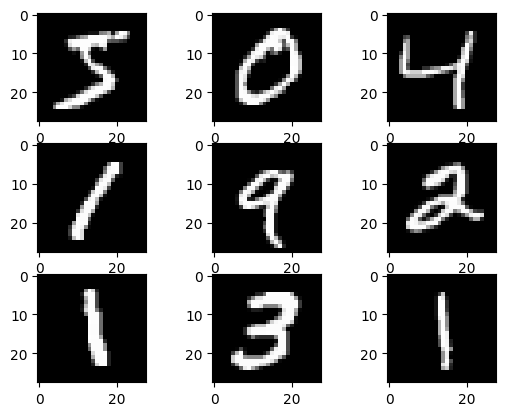

In [8]:
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

### Бинаризация данных

In [9]:
def to_bw(image):
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if image[i][j] != 0:
                image[i][j] = 1

In [10]:
(X_train_bw, y_train_bw), (X_test_bw, y_test_bw) = mnist.load_data()

for i in range(0, X_train_bw.shape[0]):
    to_bw(X_train_bw[i])
    
for i in range(0, X_test_bw.shape[0]):
    to_bw(X_test_bw[i])

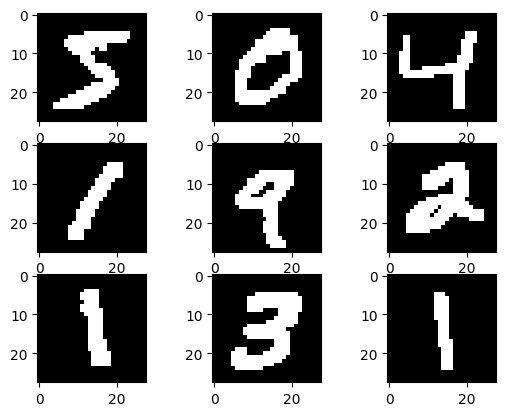

In [11]:
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train_bw[i], cmap=pyplot.get_cmap('gray'))
pyplot.show();

### Преобразование данных
Преобразование картинок в одномерные массивы пикселей
База данных MNIST содержит 60000 для обучения изображений размером 28 на 28 пикселей

In [12]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

X_train_bw = X_train_bw.reshape(60000, 28 * 28)
X_test_bw = X_test_bw.reshape(X_test_bw.shape[0], 28 * 28)

X_train.shape

(60000, 784)

In [13]:
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

### Функция обучения по картинкам

In [14]:
def predict_on_images(X_train, y_train, X_test, y_test, dist_func, klimit):
    k_values = np.arange(3, klimit, 1)
    accuracies = []
    
    for k in k_values:
        model = KNN(k = k)
        model.fit(X_train, y_train)
        pred = model.predict(X_test, dist_func)
        acc = log_loss(y_test, pred)
        accuracies.append(acc)
        print("K = " + str(k) + "; Error = " + str(acc))
    
    plt.plot(k_values, accuracies)
    plt.xlabel("K")
    plt.ylabel("Log_Loss")

In [15]:
train_start = 5000
train_limit = 10000
test_limit = 100
klimit = 20

In [16]:
def predict_with_different_dist(x_train_curr, y_train_curr, x_test_curr, y_test_curr):
    predict_on_images(
        x_train_curr[train_start:train_limit],
        y_train_curr[train_start:train_limit],
        x_test_curr[0:test_limit],
        y_test_curr[0:test_limit],
        euc_dist,
        klimit
    )
    
    predict_on_images(
        x_train_curr[train_start:train_limit],
        y_train_curr[train_start:train_limit],
        x_test_curr[0:test_limit],
        y_test_curr[0:test_limit],
        euc_dist_sqr,
        klimit
    )
    
    predict_on_images(
        x_train_curr[train_start:train_limit],
        y_train_curr[train_start:train_limit],
        x_test_curr[0:test_limit],
        y_test_curr[0:test_limit],
        abs_dist,
        klimit
    )
    
    predict_on_images(
        x_train_curr[train_start:train_limit],
        y_train_curr[train_start:train_limit],
        x_test_curr[0:test_limit],
        y_test_curr[0:test_limit],
        cheb_dist,
        klimit
    )
    

Предсказание модели для градаций серого

K = 3; Error = 21.510983694155797
K = 4; Error = 18.45209910651714
K = 5; Error = 17.809260171107628
K = 6; Error = 15.10639242663665
K = 7; Error = 14.114173372300279
K = 8; Error = 12.415980515658076
K = 9; Error = 12.406491458217415
K = 10; Error = 11.427303203962602
K = 11; Error = 10.43992789207077
K = 12; Error = 9.44206266953767
K = 13; Error = 8.790785320615866
K = 14; Error = 8.473936643121153
K = 15; Error = 8.481150928222371
K = 16; Error = 7.488455423548249
K = 17; Error = 6.84386662654813
K = 18; Error = 6.866781450396176
K = 19; Error = 6.548919491000593
K = 3; Error = 21.510983694155797
K = 4; Error = 18.45209910651714
K = 5; Error = 17.809260171107628
K = 6; Error = 15.10639242663665
K = 7; Error = 14.114173372300279
K = 8; Error = 12.415980515658076
K = 9; Error = 12.406491458217415
K = 10; Error = 11.427303203962602
K = 11; Error = 10.43992789207077
K = 12; Error = 9.44206266953767
K = 13; Error = 8.790785320615866
K = 14; Error = 8.473936643121153
K = 15; Error = 8.4

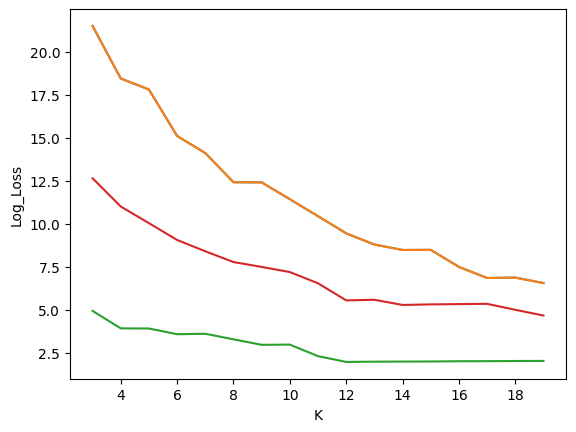

In [17]:
predict_with_different_dist(X_train, y_train, X_test, y_test)

Предсказания для Ч\Б изображений

K = 3; Error = 1.1467051789822131
K = 4; Error = 0.7964625872987651
K = 5; Error = 0.8056174986432048
K = 6; Error = 0.8175941339702745
K = 7; Error = 0.8311585122292235
K = 8; Error = 0.4953727799170851
K = 9; Error = 0.5027933474277753
K = 10; Error = 0.4978341264977486
K = 11; Error = 0.5013862376000934
K = 12; Error = 0.5068738862946359
K = 13; Error = 0.5150167655138604
K = 14; Error = 0.5211321941534958
K = 15; Error = 0.5312235645868132
K = 16; Error = 0.537139412861864
K = 17; Error = 0.5418068541264547
K = 18; Error = 0.5492112739624497
K = 19; Error = 0.5491981570998107
K = 3; Error = 1.1467051789822131
K = 4; Error = 0.7964625872987651
K = 5; Error = 0.8056174986432048
K = 6; Error = 0.8175941339702745
K = 7; Error = 0.8311585122292235
K = 8; Error = 0.4953727799170851
K = 9; Error = 0.5027933474277753
K = 10; Error = 0.4978341264977486
K = 11; Error = 0.5013862376000934
K = 12; Error = 0.5068738862946359
K = 13; Error = 0.5150167655138604
K = 14; Error = 0.5211321941534958


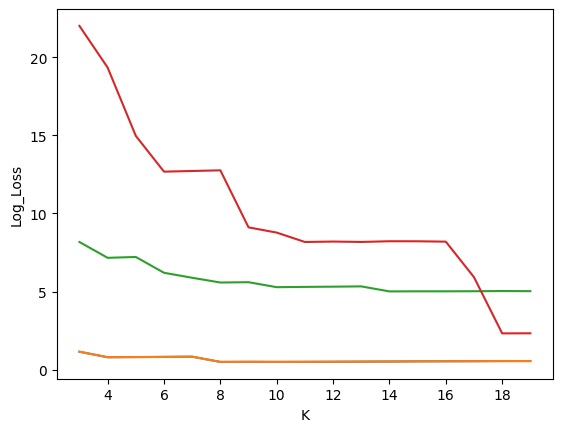

In [18]:
predict_with_different_dist(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

По результатам предсказаний:
* На картинках с градациями серого лучше себя показало модульное расстояние. Значение ошибки: 2.01
* На Ч/Б картинках лучше себя показало евклидово расстояние. Значение ошибки: 0.54

In [19]:
import random

### Зашумление данных

In [20]:
def gray_noise(pixel):
    result = random.randint(0, 255)
    while result == pixel:
        result = random.randint(0, 255)
    return result

def bw_noise(pixel):
    if pixel == 0:
        return 1
    else:
        return 0

Зашумление картинки либо полностью, либо частично. Также можем зашумлять область со случайным центром и радиусом. Вероятность зашумления пикселя задается вручную в параметре функции.

In [21]:
def noise_image(image, probability, func):
    for x in range(image.shape[0]):
      if random.random() < probability:
        image[x] = func(image[x])


def noise_image_area(image, center, radius, probability, func):
    x_start = 0
    y_start = 0
    x_finish = 28
    y_finish = 28
    
    if center[0] - radius > 0:
        x_start = center[0] - radius
    if center[1] - radius > 0:
        y_start = center[1] - radius
    if center[0] + radius < 28:
        x_finish = center[0] + radius
    if center[1] + radius < 28:
        y_finish = center[1] + radius

    for x in range(x_start, x_finish):
        for y in range(y_start, y_finish):
            if random.random() < probability:
                image[x * 28 + y] = func(x * 28 + y)


def noise_images(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image(images[i], prob, noise_func)


def noise_images_area(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image_area(images[i], (random.randint(0, 27), random.randint(0, 27)), random.randint(2, 7), prob, noise_func)

  
def show_images(images):
  images = images.copy().reshape(len(images), 28, 28)
  from matplotlib import pyplot
  for i in range(min(9, len(images))):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [22]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

X_train_bw_orig = X_train_bw.copy()
X_test_bw_orig = X_test_bw.copy()

Равномерное зашумление градаций серого

In [23]:
noise_images(X_train, 0.3, gray_noise)
noise_images(X_test, 0.3, gray_noise)

Равномреное зашумление Ч/Б

In [24]:
noise_images(X_train_bw, 0.3, bw_noise)
noise_images(X_test_bw, 0.3, bw_noise)

Примеры равномерно зашумленных изображений

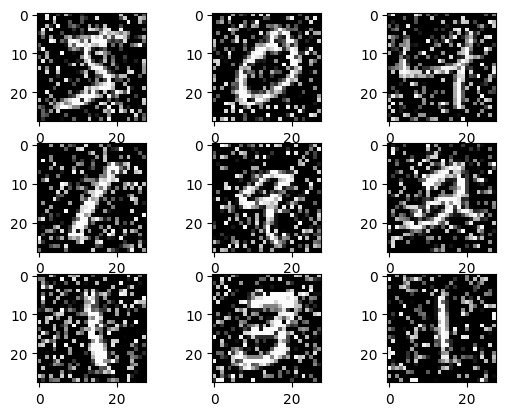

In [25]:
show_images(X_train)

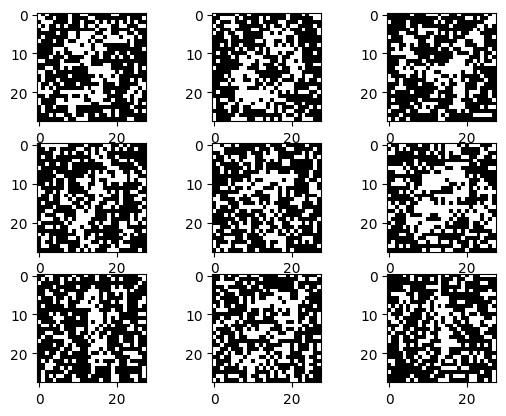

In [26]:
show_images(X_train_bw)

Предсказание для равномерно зашумленных градаций серого

K = 3; Error = 23.721602040130634
K = 4; Error = 22.397284394259785
K = 5; Error = 21.06782153015073
K = 6; Error = 18.69888909218413
K = 7; Error = 17.01342731850643
K = 8; Error = 15.677185695958373
K = 9; Error = 14.34109715888753
K = 10; Error = 13.691097345365597
K = 11; Error = 12.686274717560572
K = 12; Error = 11.720398780599654
K = 13; Error = 11.068841488591035
K = 14; Error = 11.07845195521979
K = 15; Error = 9.092298202911417
K = 16; Error = 8.445110165484534
K = 17; Error = 7.8099539725593665
K = 18; Error = 7.462066920734006
K = 19; Error = 7.4800539308315095
K = 3; Error = 23.721602040130634
K = 4; Error = 22.397284394259785
K = 5; Error = 21.06782153015073
K = 6; Error = 18.69888909218413
K = 7; Error = 17.01342731850643
K = 8; Error = 15.677185695958373
K = 9; Error = 14.34109715888753
K = 10; Error = 13.691097345365597
K = 11; Error = 12.686274717560572
K = 12; Error = 11.720398780599654
K = 13; Error = 11.068841488591035
K = 14; Error = 11.07845195521979
K = 15; Erro

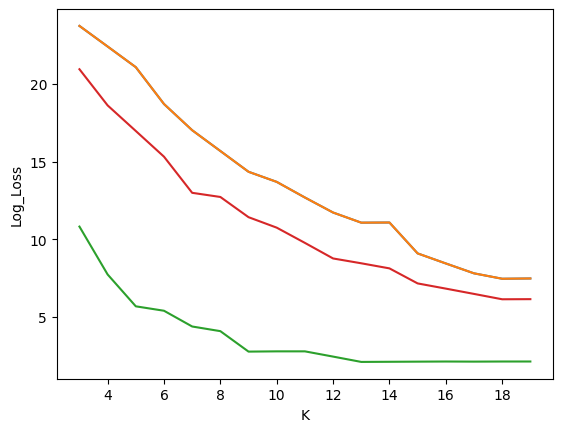

In [27]:
predict_with_different_dist(X_train, y_train, X_test, y_test)

Предсказание для равномерно зашумленных Ч/Б изображений

K = 3; Error = 12.036589426914093
K = 4; Error = 9.661815026660465
K = 5; Error = 7.614138302624047
K = 6; Error = 7.28430553431835
K = 7; Error = 6.60802881444641
K = 8; Error = 5.6094939633568375
K = 9; Error = 4.2728564382959995
K = 10; Error = 3.933023421276392
K = 11; Error = 3.6144558363881902
K = 12; Error = 3.619196206496346
K = 13; Error = 3.617711309413677
K = 14; Error = 3.292463904222407
K = 15; Error = 2.6207238341107444
K = 16; Error = 2.6395851809998794
K = 17; Error = 2.303025457476316
K = 18; Error = 2.3054457766164016
K = 19; Error = 2.316231892570925
K = 3; Error = 12.036589426914093
K = 4; Error = 9.661815026660465
K = 5; Error = 7.614138302624047
K = 6; Error = 7.28430553431835
K = 7; Error = 6.60802881444641
K = 8; Error = 5.6094939633568375
K = 9; Error = 4.2728564382959995
K = 10; Error = 3.933023421276392
K = 11; Error = 3.6144558363881902
K = 12; Error = 3.619196206496346
K = 13; Error = 3.617711309413677
K = 14; Error = 3.292463904222407
K = 15; Error = 2.620

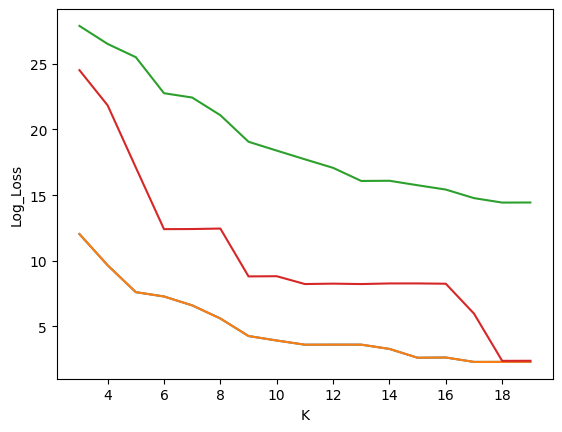

In [28]:
predict_with_different_dist(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

По результатам предсказаний:
* Для градаций серого модульное расстояние также лучше, но точность стала хуже, чем у не зашумленных. Значение ошибки: 2.13
* Для Ч/Б евклидово расстояние также лучше, но точность стала хуже, чем у не зашумленных. Значение ошибки: 2.31

In [29]:
X_train = X_train_orig.copy()
X_test = X_test_orig.copy()

X_train_bw = X_train_bw_orig.copy()
X_test_bw = X_test_bw_orig.copy()

Неравномерное зашумление градаций серого

In [30]:
noise_images_area(X_train, 0.3, gray_noise)
noise_images_area(X_test, 0.3, gray_noise)

Неравномерное зашумление Ч/Б

In [31]:
noise_images_area(X_train_bw, 0.3, bw_noise)
noise_images_area(X_test_bw, 0.3, bw_noise)

Примеры неравномерно зашумленных изображений

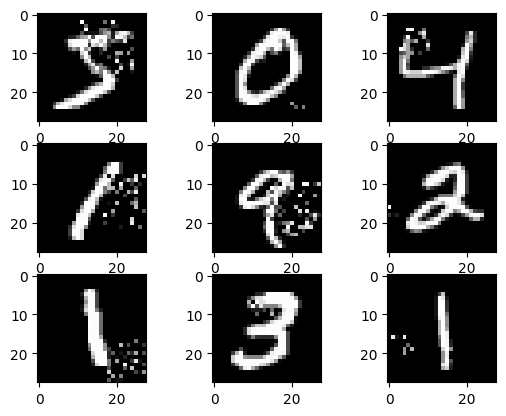

In [32]:
show_images(X_train)

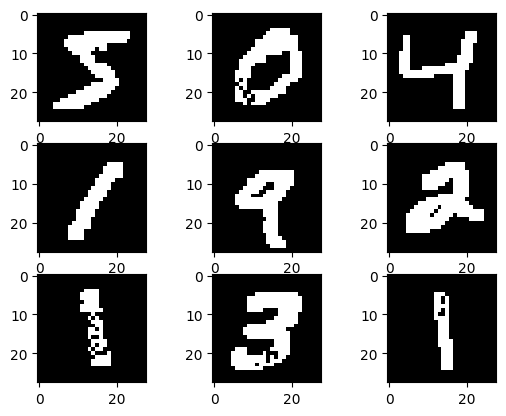

In [33]:
show_images(X_train_bw)

Предсказания для неравномерно зашумленных градаций серого

K = 3; Error = 19.14173367733114
K = 4; Error = 16.78161440136767
K = 5; Error = 15.495431362485853
K = 6; Error = 13.491257840999586
K = 7; Error = 11.814736592746554
K = 8; Error = 11.163211500211364
K = 9; Error = 10.17566656445601
K = 10; Error = 9.529679550639464
K = 11; Error = 9.534035379802464
K = 12; Error = 9.54383364561328
K = 13; Error = 8.539450536561363
K = 14; Error = 8.205995294578141
K = 15; Error = 7.8900283094182235
K = 16; Error = 7.242665051513458
K = 17; Error = 6.899364239865328
K = 18; Error = 6.250823491932267
K = 19; Error = 5.604951167722638
K = 3; Error = 19.14173367733114
K = 4; Error = 16.78161440136767
K = 5; Error = 15.495431362485853
K = 6; Error = 13.491257840999586
K = 7; Error = 11.814736592746554
K = 8; Error = 11.163211500211364
K = 9; Error = 10.17566656445601
K = 10; Error = 9.529679550639464
K = 11; Error = 9.534035379802464
K = 12; Error = 9.54383364561328
K = 13; Error = 8.539450536561363
K = 14; Error = 8.205995294578141
K = 15; Error = 7.890

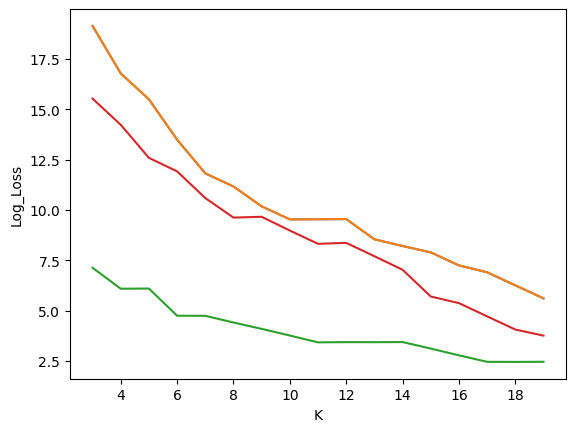

In [34]:
predict_with_different_dist(X_train, y_train, X_test, y_test)

Предсказания для неравномерно зашумленных Ч/Б

K = 3; Error = 0.7984325983342865
K = 4; Error = 0.8201338234400813
K = 5; Error = 0.8400376924050289
K = 6; Error = 0.8506654426965053
K = 7; Error = 0.5128455402923868
K = 8; Error = 0.5145127484694233
K = 9; Error = 0.5052732333408884
K = 10; Error = 0.51324086288277
K = 11; Error = 0.5219904247619843
K = 12; Error = 0.5267626672818198
K = 13; Error = 0.5361096351929482
K = 14; Error = 0.5431909177323838
K = 15; Error = 0.5541001282956028
K = 16; Error = 0.5584039184518866
K = 17; Error = 0.5605968489071307
K = 18; Error = 0.5670130983701207
K = 19; Error = 0.5688951515011156
K = 3; Error = 0.7984325983342865
K = 4; Error = 0.8201338234400813
K = 5; Error = 0.8400376924050289
K = 6; Error = 0.8506654426965053
K = 7; Error = 0.5128455402923868
K = 8; Error = 0.5145127484694233
K = 9; Error = 0.5052732333408884
K = 10; Error = 0.51324086288277
K = 11; Error = 0.5219904247619843
K = 12; Error = 0.5267626672818198
K = 13; Error = 0.5361096351929482
K = 14; Error = 0.5431909177323838
K =

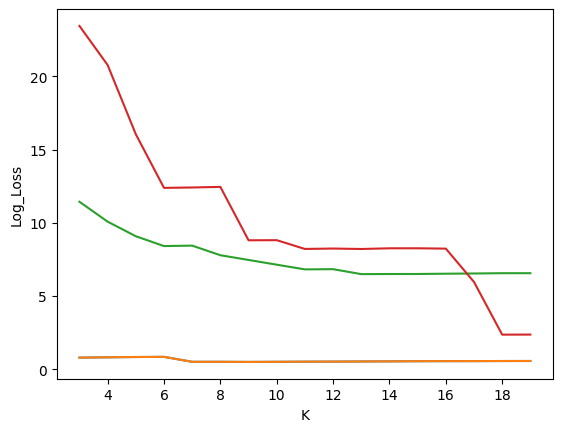

In [35]:
predict_with_different_dist(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

По результатам предсказаний:
* Для градаций серого модульное расстояние также лучше, но точность стала хуже, чем у не зашумленных
* Для Ч/Б евклидово расстояние также лучше, но точность стала хуже, чем у не зашумленных

Сравнительная таблица:

| Наилучшее расстояние | Изначальные | Равномерно зашумленные | Неравномерно зашумленные |
|----------------------|-------------|------------------------|--------------------------|
| Модульное            | 2.01        | 2.13                   | 2.45                     |
| Евклидово            | 0.54        | 2.31                   | 0.56                     |

## kNN- и ODIN- идентификаторы

In [36]:
X_train_orig.shape

(60000, 784)

In [37]:
def knn(images, distf, outcasts, k_value):
    result = 0
    
    for img in images:
      tmp_list = images.copy()
      tmp_list.remove(img)
      tmp_list.sort(key=lambda img1: distf(np.array(img), np.array(img1))) 
      dists = [tmp_list[:k_value]]
      
      # print("Min dist = ", np.min(dists))
      # print("Max dist = ", np.max(dists))
      # print("Mean dist = ", np.mean(dists))

      if np.mean(dists) > 50:
          outcasts.append(img)
          result += 1
    
    return result

In [38]:
def odin(images, distf, outcasts, limit=4, num_occurences=1):
  candidates = []
  
  for img in images:
    tmp_list = images.copy()
    tmp_list.remove(img)
    tmp_list.sort(key=lambda img1: distf(np.array(img), np.array(img1)))
    candidates.append(tmp_list[:limit])
    
    merged_candidates = []
    for img_list in candidates:
      for img in img_list:
        merged_candidates.append(img)
    
  result = 0
  for img in images:
    if merged_candidates.count(img) <= num_occurences:
      outcasts.append(img)
      result += 1
    
  return result

In [39]:
def show_images_outliers(images):
  images = images.copy().reshape(len(images), 28, 28)
  from matplotlib import pyplot
  pyplot.subplots(figsize=(28, 28))
  for i in range(len(images)):
    pyplot.subplot(15, 6, 1 + i)
    pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [40]:
X_train_noised = X_train_orig.copy()

In [41]:
noise_images(X_train_noised, 0.3, gray_noise)

In [42]:
test_set = X_train_orig[1000:2000].tolist().copy()

### Поиск выбросов в изначальной выборке

ODIN

In [43]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 20)

25

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


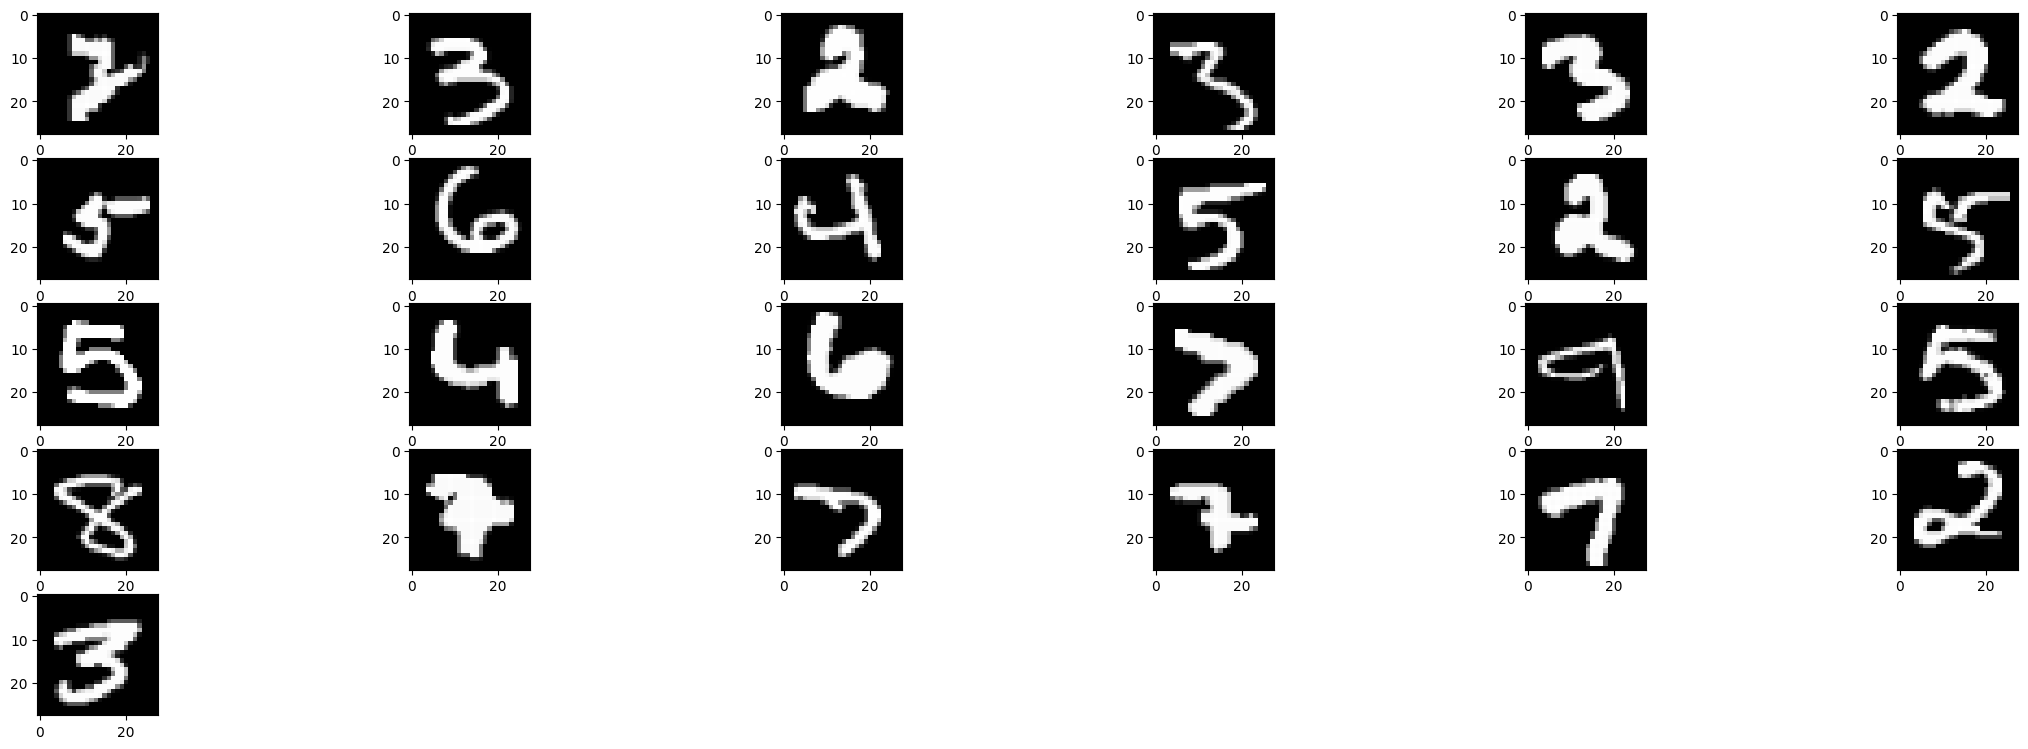

In [44]:
show_images_outliers(np.array(outcasts))

kNN

In [45]:
outcasts = []
knn(test_set, euc_dist, outcasts, 20)

48

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


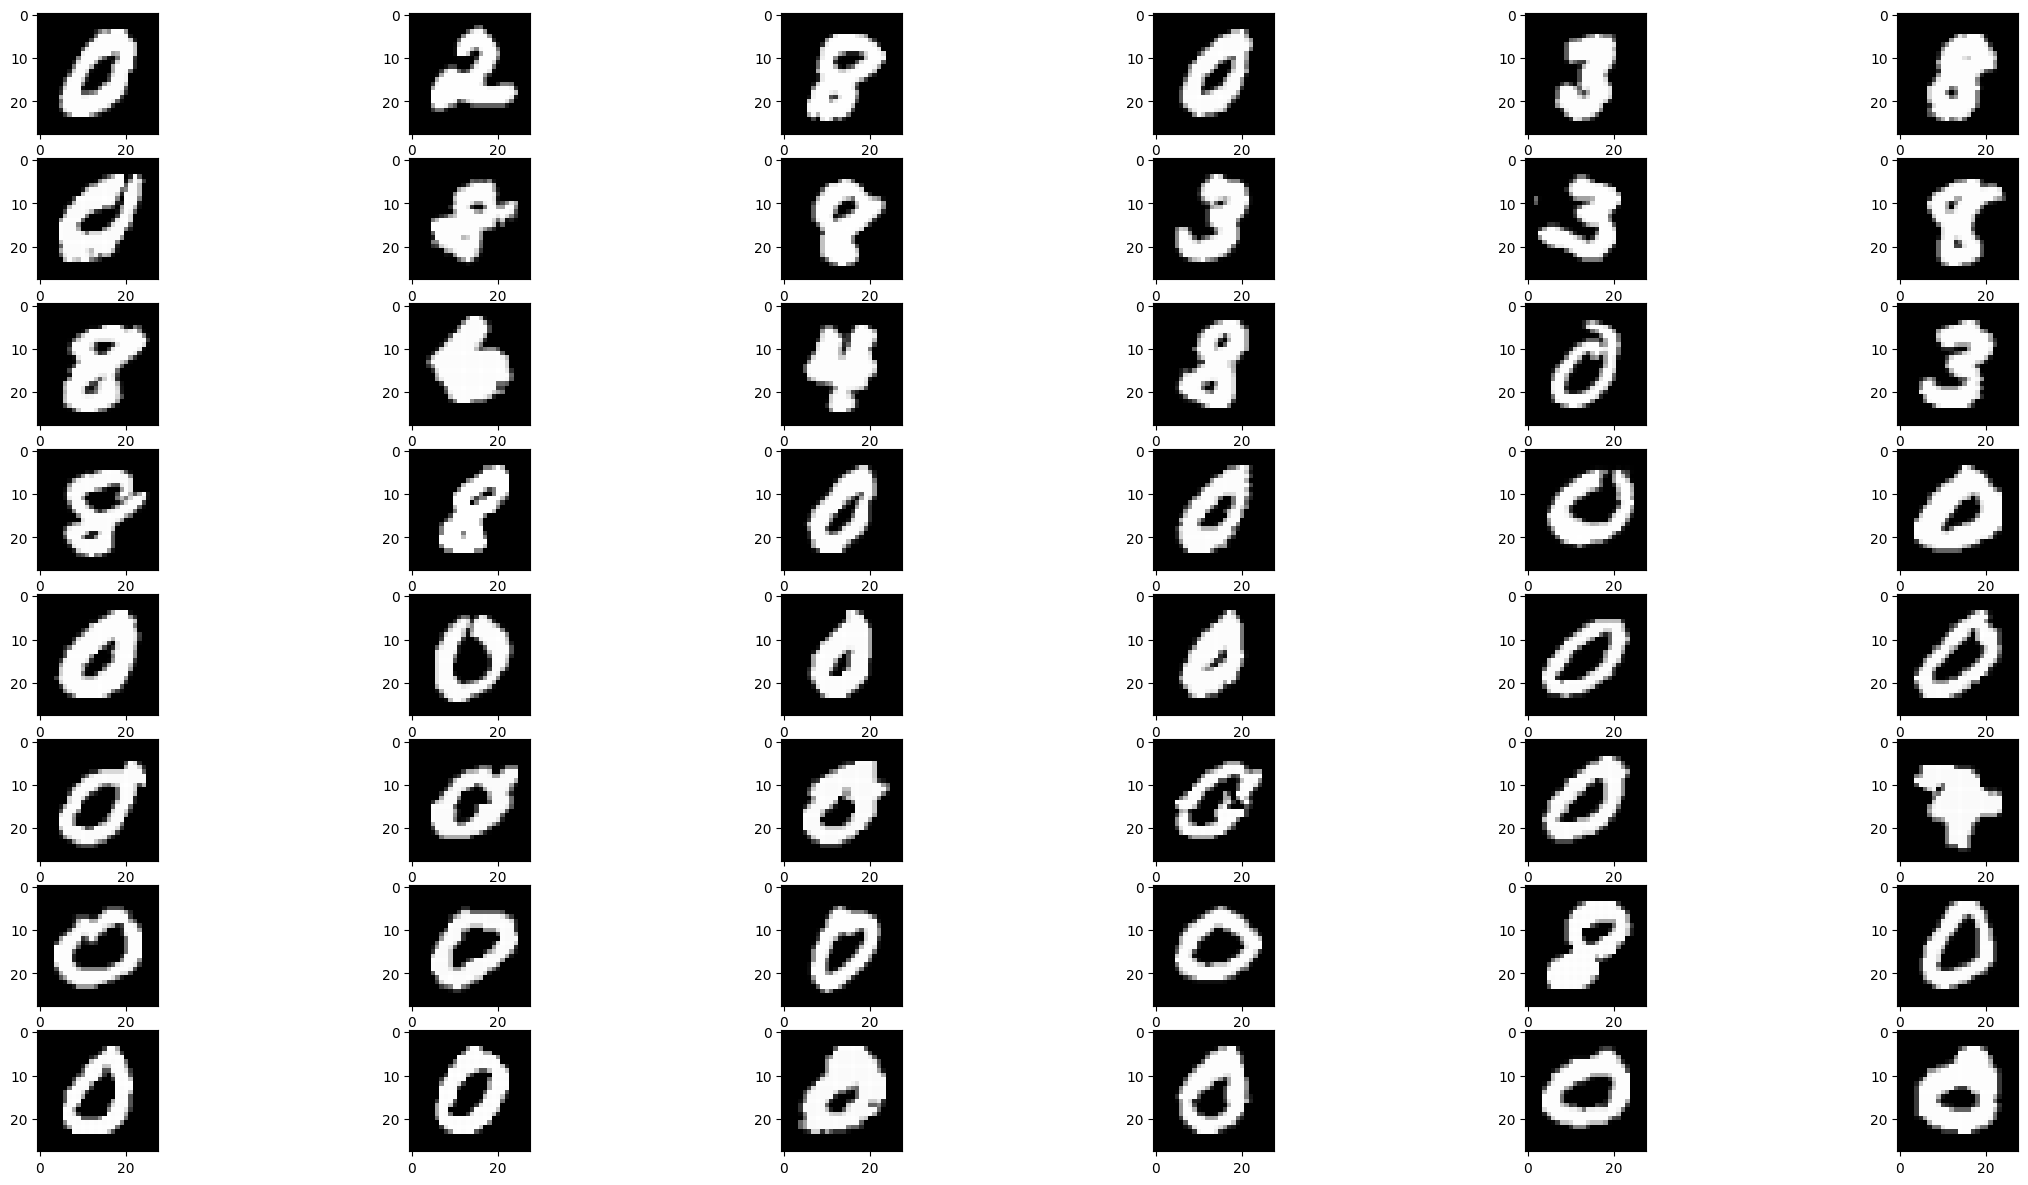

In [46]:
show_images_outliers(np.array(outcasts))

Результаты на изначальной выборке:
* ODIN: Число выбросов - 25
* kNN: Число выбросов - 48

Выброс - черный квадрат

In [47]:
test_set.append([255] * 784)

ODIN

In [48]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 20)

24

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


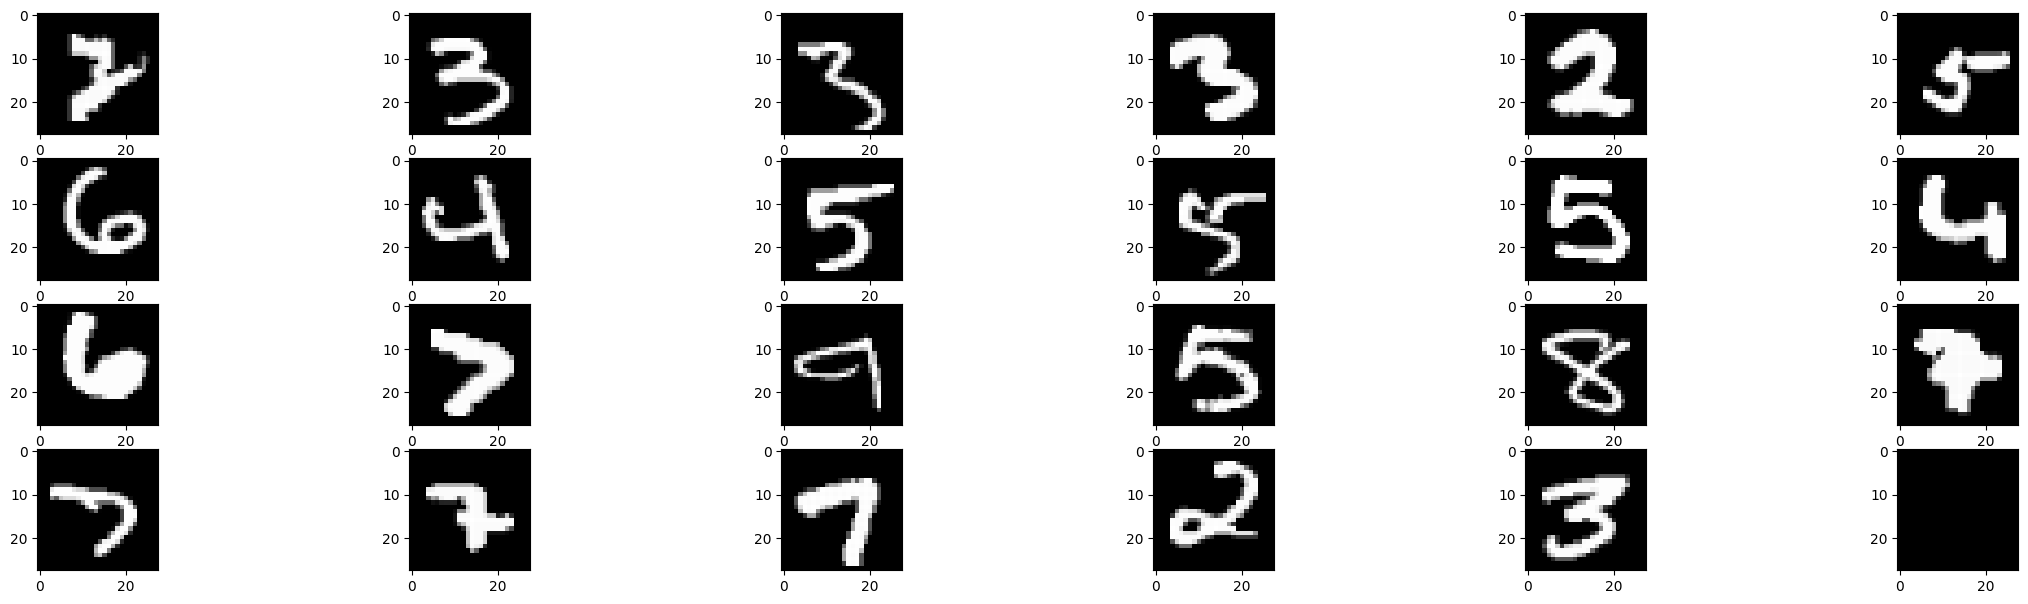

In [49]:
show_images_outliers(np.array(outcasts))

kNN

In [50]:
outcasts = []
knn(test_set, euc_dist, outcasts, 20)

49

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


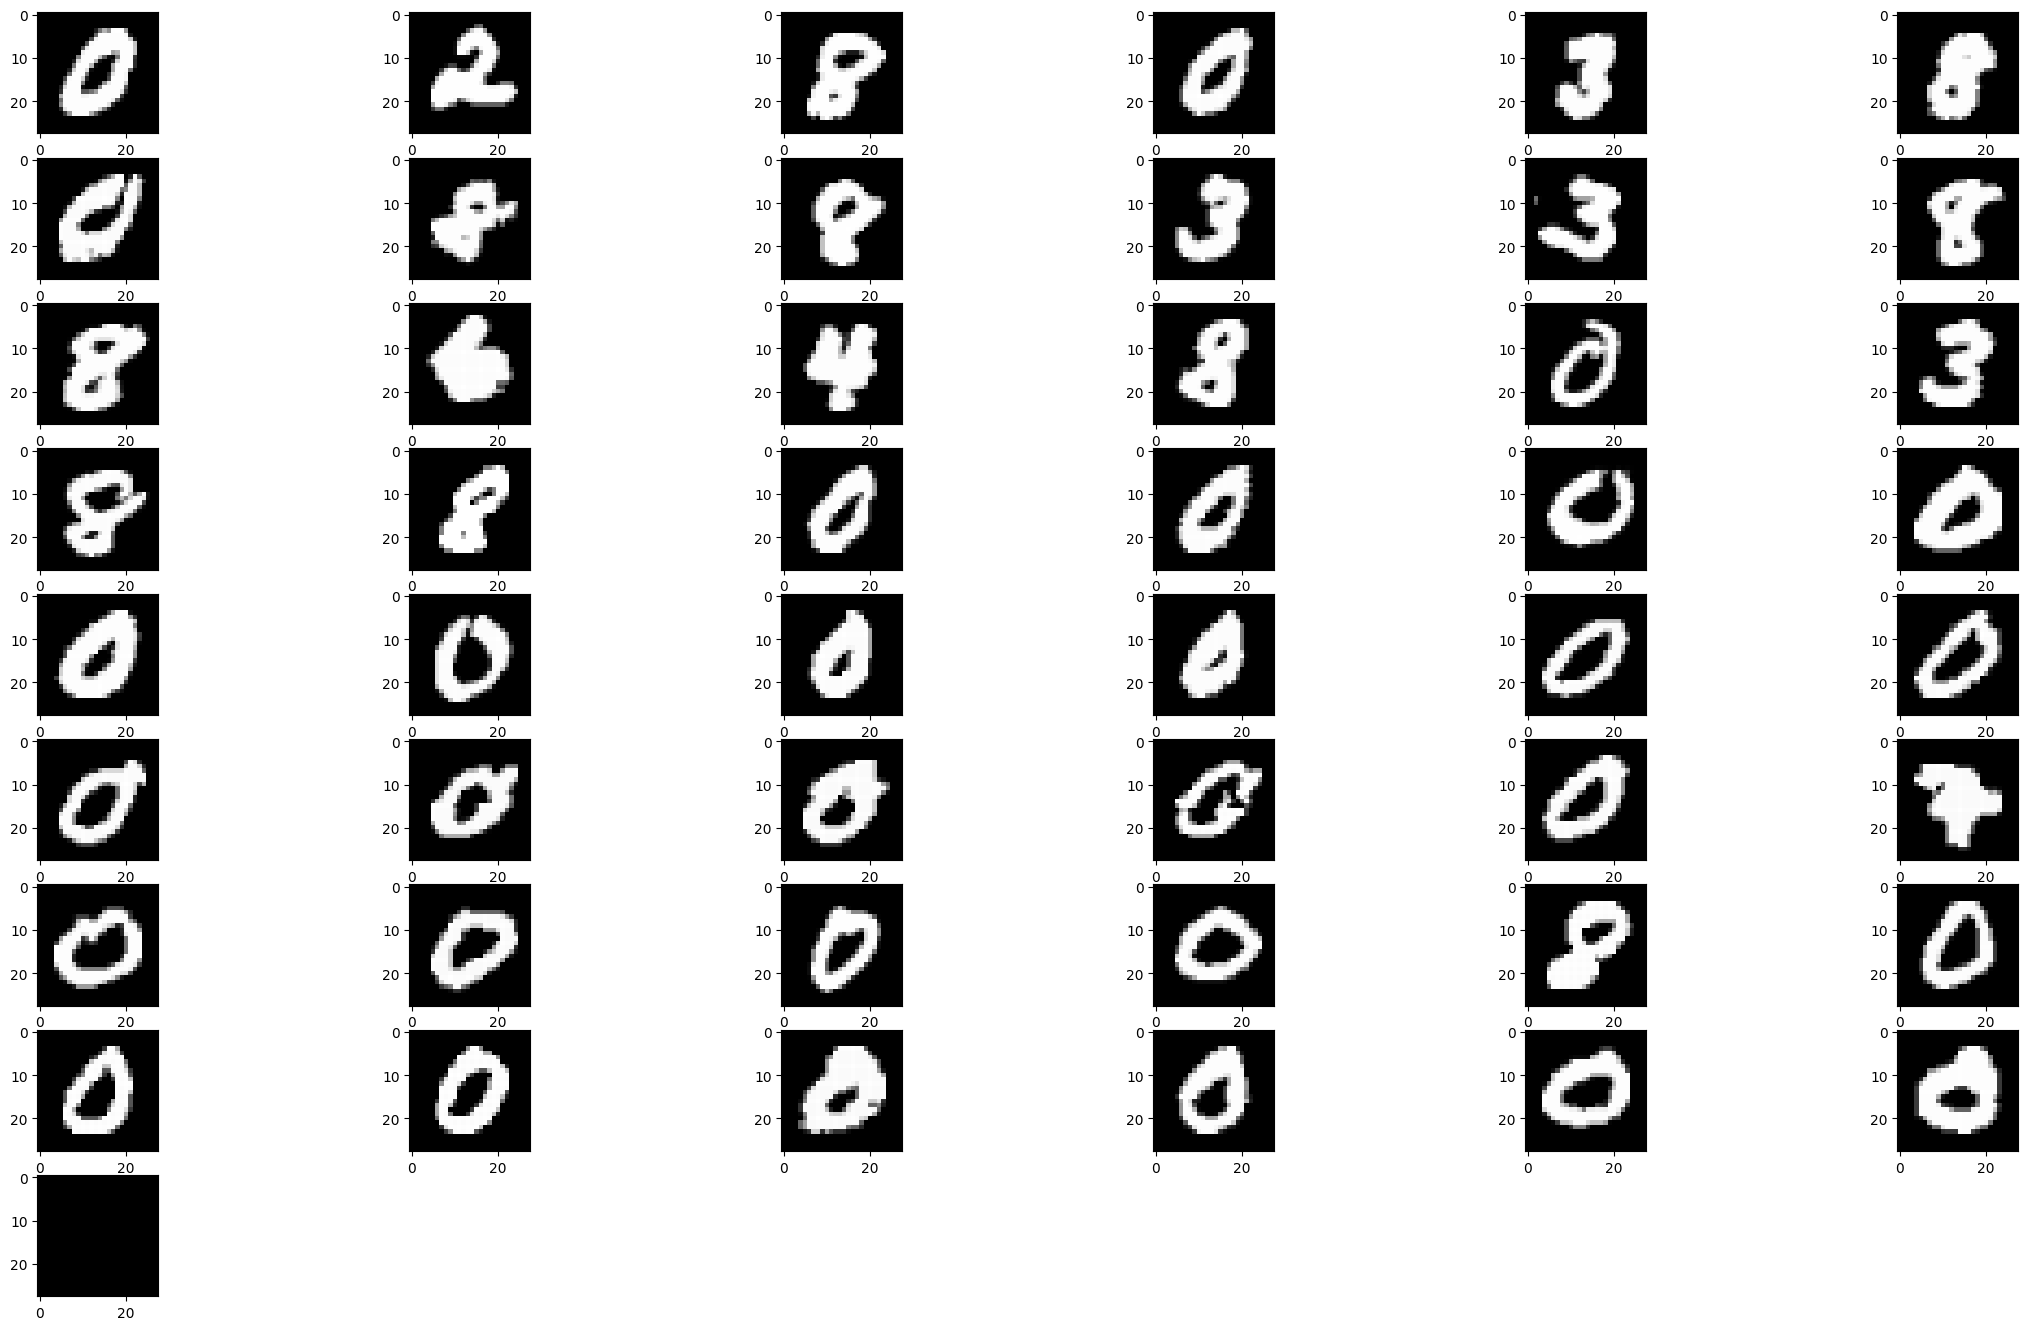

In [51]:
show_images_outliers(np.array(outcasts))

Результаты на выборке с черным квадратом:
* ODIN: Число выбросов - 24
* kNN: Число выбросов - 49

Оба подхода нашли черный квадрат и идентифицировали его как выброс.

Выбросы - зашумленные изображения

In [52]:
test_set.extend(X_train_noised[1000:1050].tolist())

ODIN

In [53]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 20)

69

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


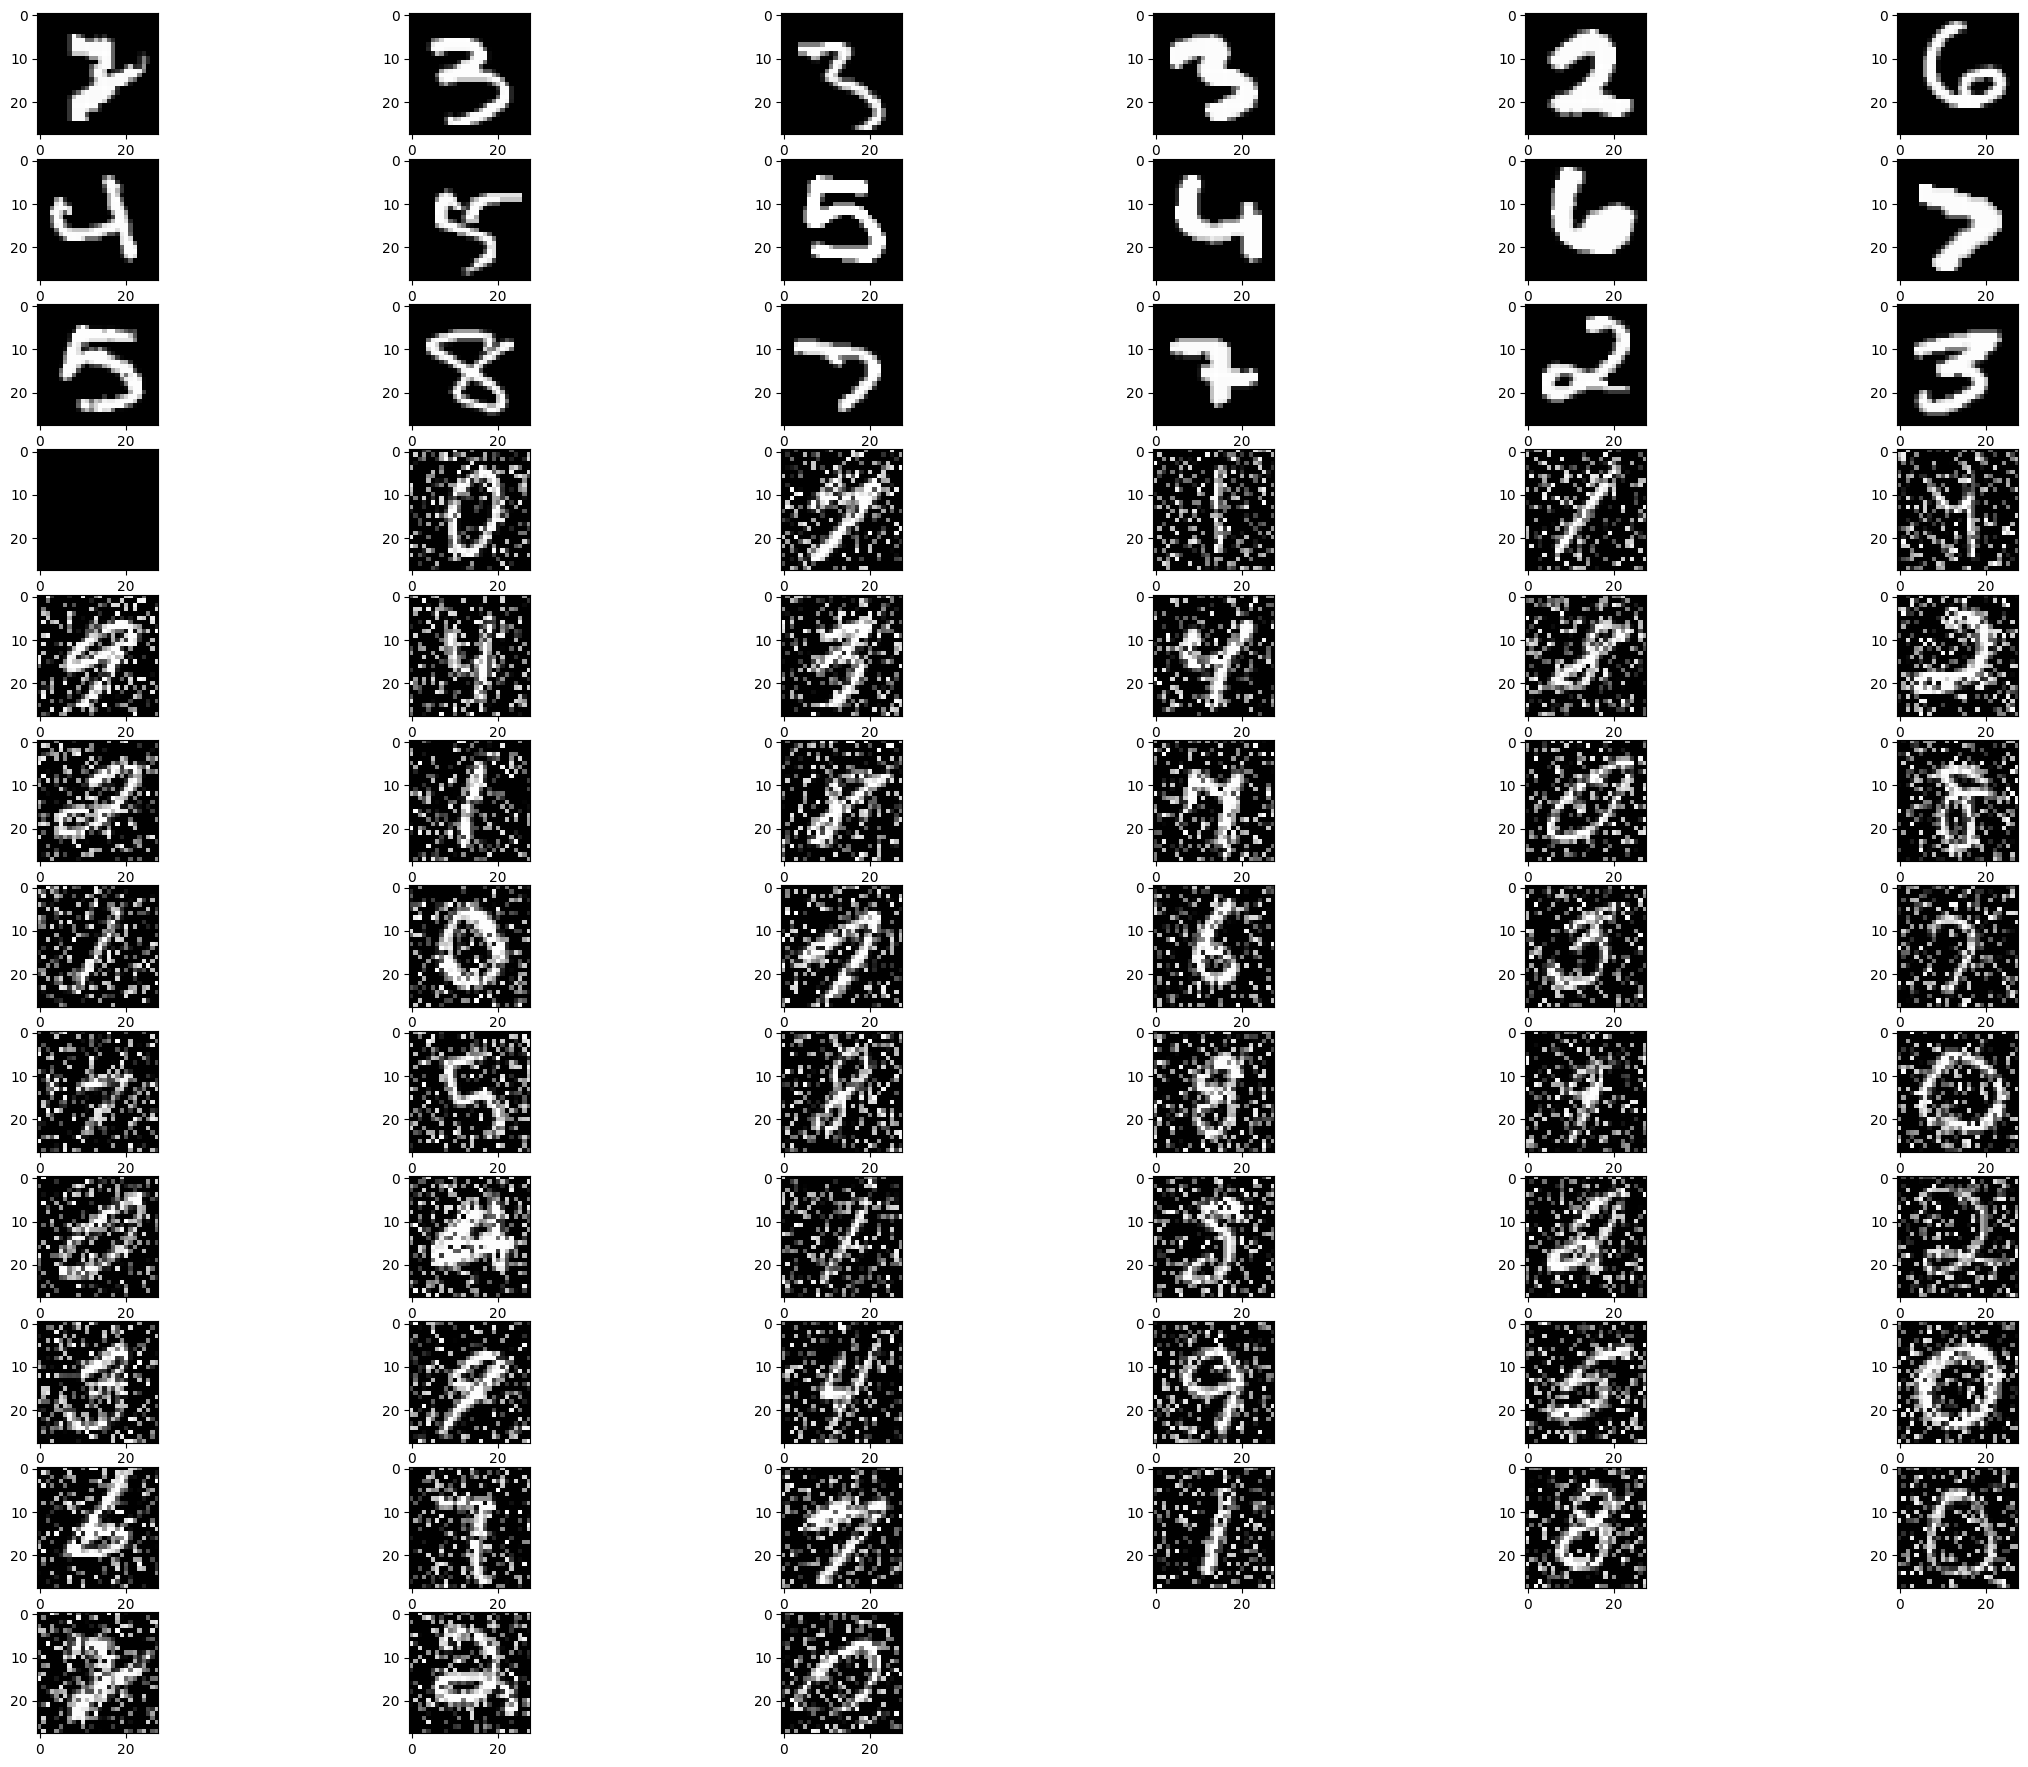

In [54]:
show_images_outliers(np.array(outcasts))

kNN

In [55]:
outcasts = []
knn(test_set, euc_dist, outcasts, 20)

50

C:\Users\Alexey\AppData\Local\Temp\ipykernel_2452\3343849652.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(15, 6, 1 + i)


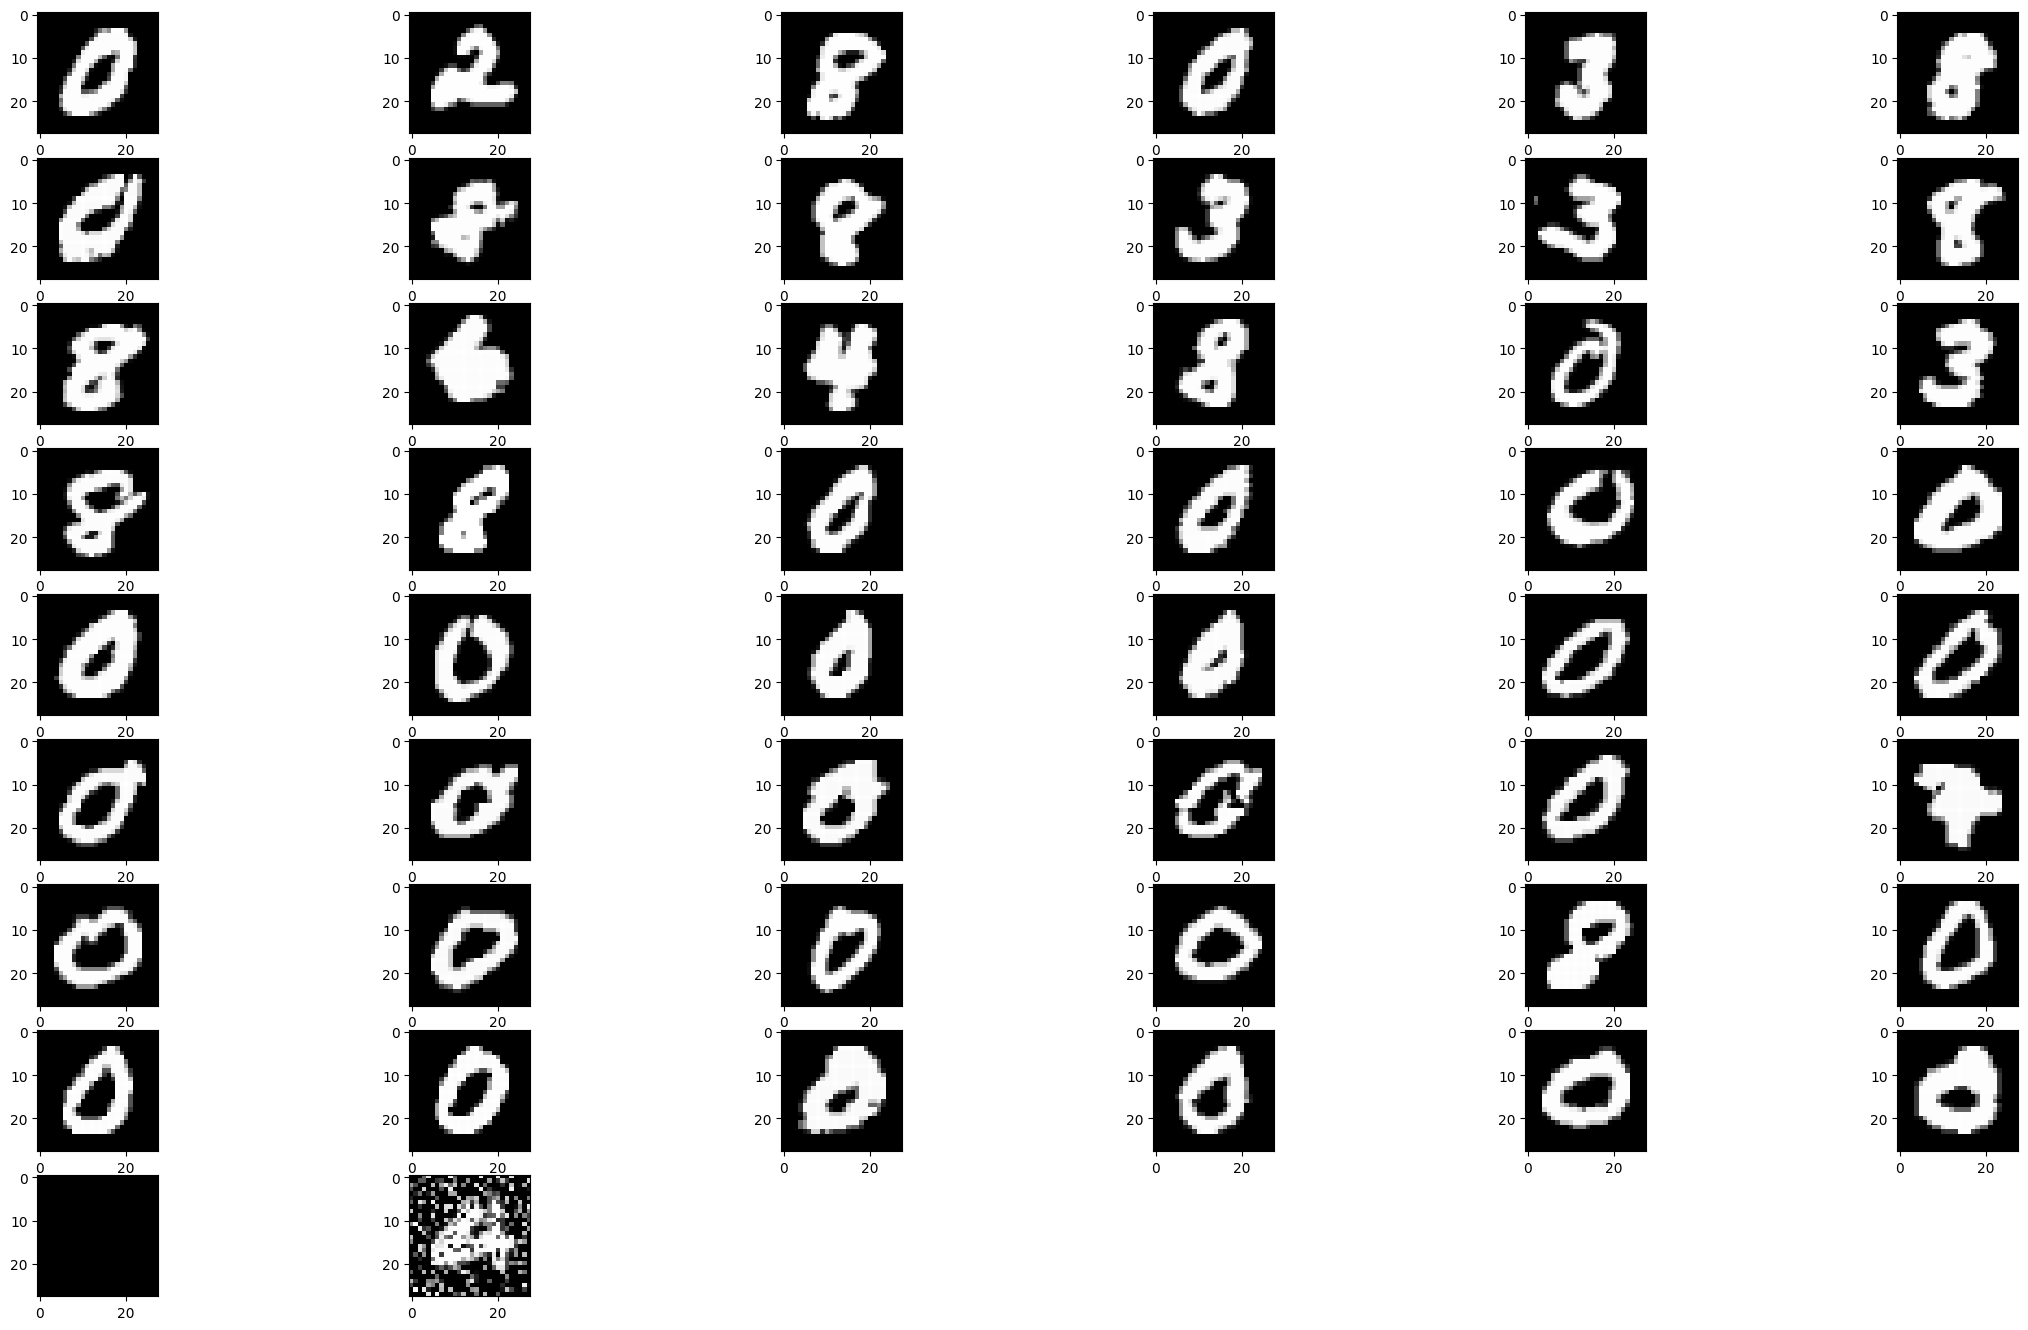

In [56]:
show_images_outliers(np.array(outcasts))

Результаты на выборке с черным квадратом и зашумленными изображениями:
* ODIN: Число выбросов - 69
* kNN: Число выбросов - 50

ODIN в отличие от kNN нашел больше зашумленных выбросов, в то время как kNN нашел только один. 